In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

In [96]:
df = pd.read_csv("survayData.csv")
print(df.shape)
df.head()

(32, 13)


,타임스탬프,method,Inconvenience,useService,willpay,tipPrice,Contact,Region,moreGuide,sex,age,usedGuide,usedGuidesa
0,2023. 3. 11 오후 6:43:37,Search via SNS,noting,Maybe,Yes,NaN,NaN,Asia Pacific,Maybe,unknown,20~29,No,NaN
1,2023. 3. 11 오후 6:48:34,Search via SNS,goolge map,Maybe,Maybe,NaN,NaN,Asia Pacific,Maybe,unknown,20~29,No,NaN
2,2023. 3. 18 오전 9:05:00,other thing,no friends,No,Maybe,NaN,NaN,Americas,No,Female,~19,No,NaN
3,2023. 3. 18 오전 9:14:50,Search via SNS,NaN,Maybe,Yes,3000.0,NaN,Americas,Yes,Male,20~29,No,NaN
4,2023. 3. 18 오전 9:18:13,"Search via SNS, other thing",NaN,Yes,No,NaN,NaN,Americas,Maybe,Female,20~29,No,NaN


In [97]:
for i in df.columns:
    print(i,"=>\t", df[i].nunique())

타임스탬프 =>	 32
method =>	 8
Inconvenience =>	 17
useService =>	 3
willpay =>	 3
tipPrice =>	 12
Contact =>	 4
Region =>	 3
moreGuide =>	 3
sex =>	 3
age =>	 5
usedGuide =>	 2
usedGuidesa =>	 4


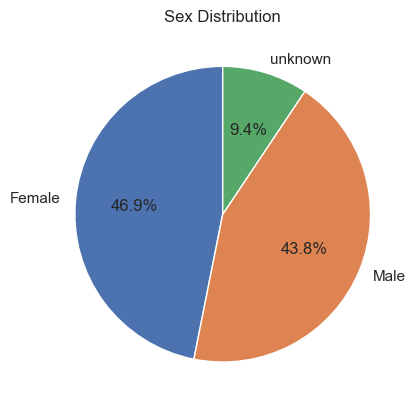

In [98]:
# Get the counts for each category in the sex column
sex_counts = df['sex'].value_counts()

# Create a pie chart for the sex column
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title("Sex Distribution")

# Display the pie chart
plt.show()

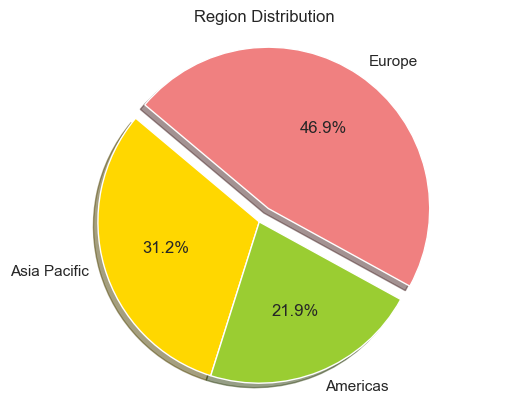

In [99]:
# 파이 차트 설정
region_counter = Counter(df["Region"])

labels = list(region_counter.keys())
sizes = list(region_counter.values())
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0.1)  # 첫 번째 조각만 약간 돌출되게 설정

# 파이 차트 그리기
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# 차트의 가운데에 원 그리기 (도넛 차트처럼 보이게 하려면 이 코드를 추가하세요)
# plt.gca().set_aspect("equal")
# plt.gca().add_artist(plt.Circle((0,0), 0.7, fc='white'))

# 파이 차트 타이틀
plt.title("Region Distribution")

# 차트 출력
plt.axis('equal')  # 차트를 원형으로 만듭니다.
plt.show()

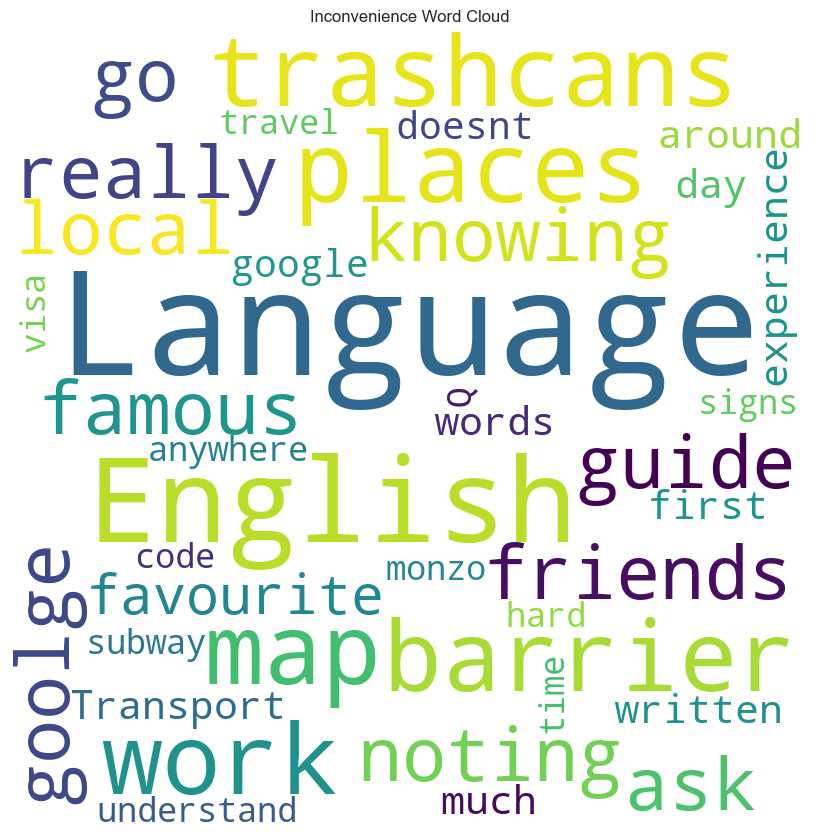

In [100]:
from wordcloud import WordCloud
# Combine all inconvenience responses into a single text
inconvenience_text = ' '.join(df['Inconvenience'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(inconvenience_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Inconvenience Word Cloud")
plt.show()

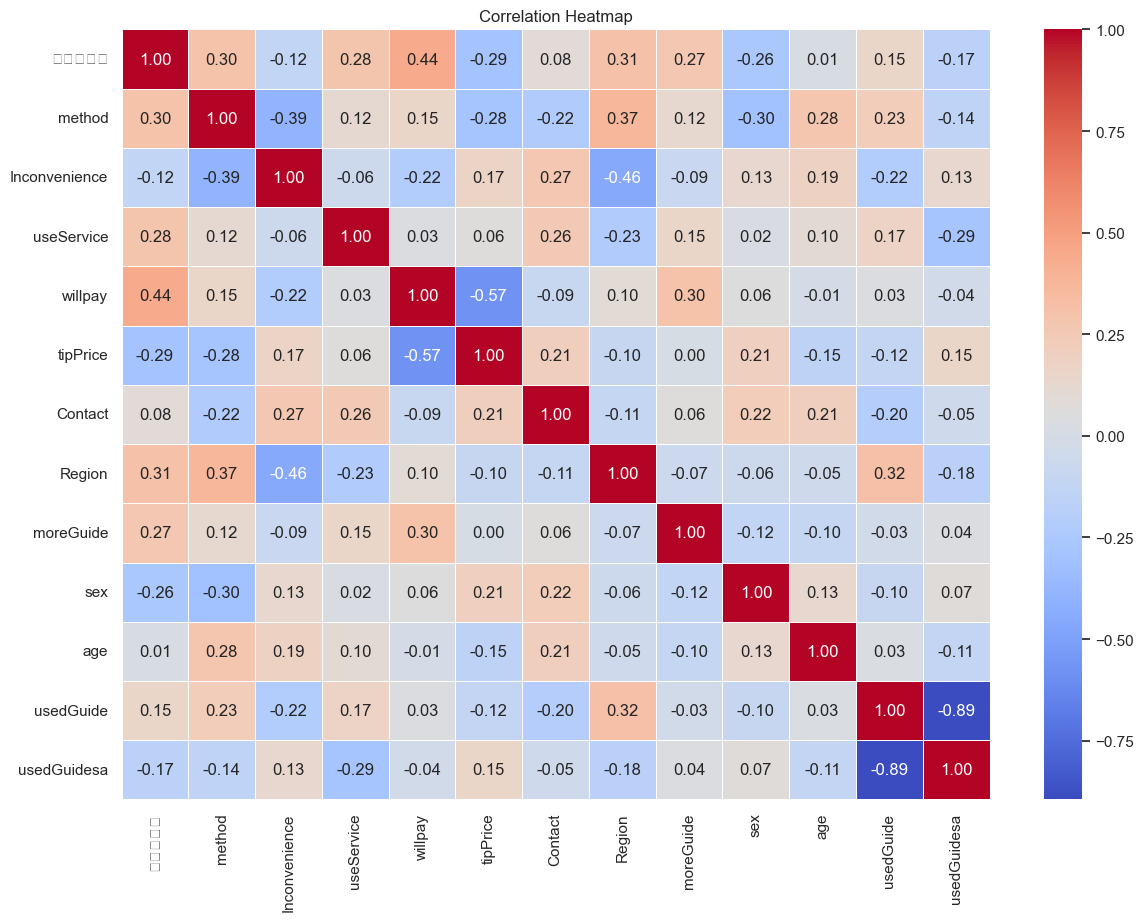

In [101]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to all columns
encoded_df = df.apply(LabelEncoder().fit_transform)
correlation_matrix = encoded_df.corr()
# Set the Seaborn theme
sns.set_theme(style="white")

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")

# Set the title and show the heatmap
plt.title("Correlation Heatmap")
plt.show()

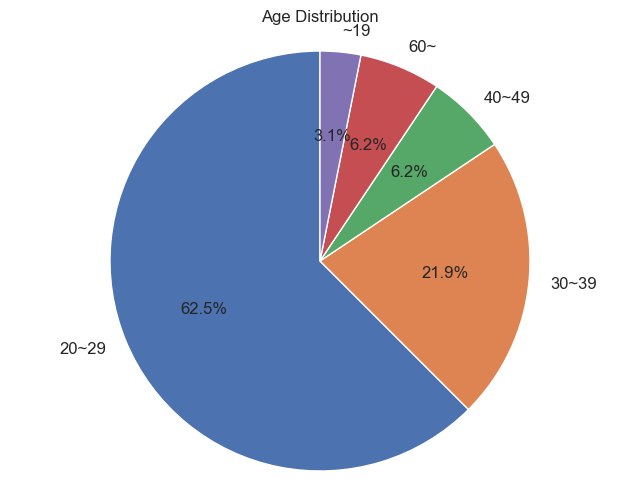

In [102]:
# Count the occurrences of each age group
age_counts = df['age'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

# Set the title and equal aspect ratio for the pie chart
plt.title("Age Distribution")
plt.axis("equal")

# Display the pie chart
plt.show()

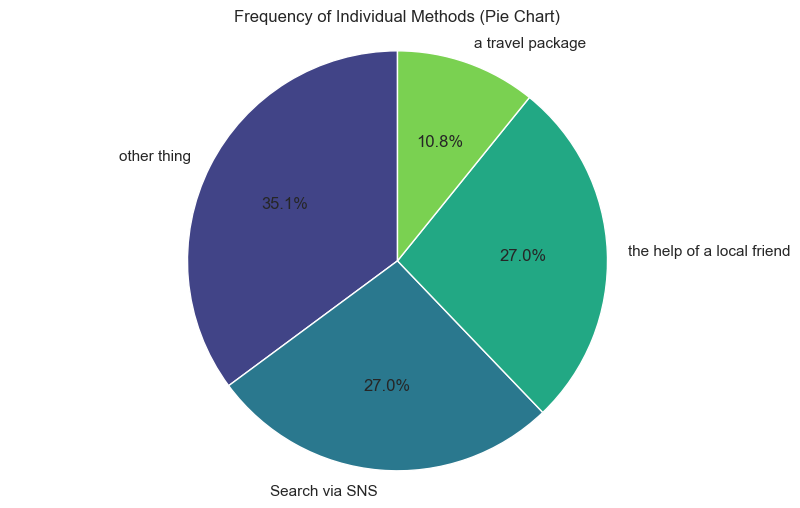

In [103]:
# method 값 분리 및 펼치기
split_methods = df['method'].str.split(', ', expand=True).stack().reset_index(drop=True)

# 빈도 계산
split_method_counts = split_methods.value_counts()

# Seaborn 스타일 설정
sns.set_theme(style="whitegrid")

# 파이 차트 생성
plt.figure(figsize=(10, 6))
plt.pie(split_method_counts.values, labels=split_method_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(split_method_counts)))
plt.title('Frequency of Individual Methods (Pie Chart)')
plt.axis('equal')
plt.show()

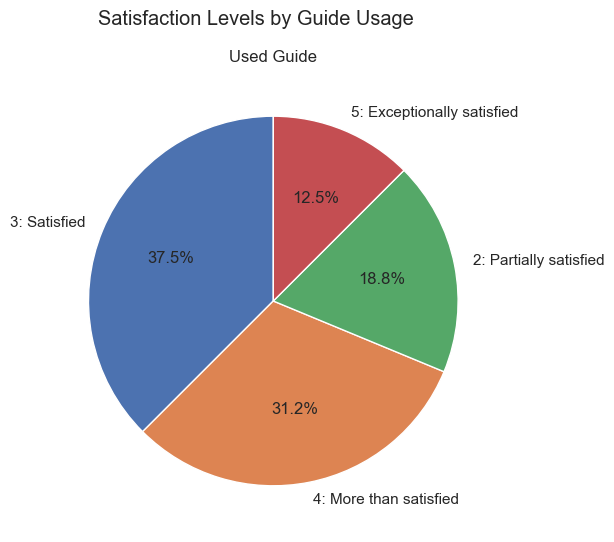

In [104]:
# Get the counts for each satisfaction level for those who have used a guide and those who haven't
used_guide_counts = df[df['usedGuide'] == 'Yes']['usedGuidesa'].value_counts()
not_used_guide_counts = df[df['usedGuide'] == 'No']['usedGuidesa'].value_counts()

# Create a subplot with 1 row and 2 columns
fig,ax1 = plt.subplots(1, 1, figsize=(14, 6))

# Create a pie chart for those who have used a guide
ax1.pie(used_guide_counts, labels=used_guide_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Used Guide")

# Set the main title for both pie charts
plt.suptitle("Satisfaction Levels by Guide Usage")

# Display the pie charts
plt.show()

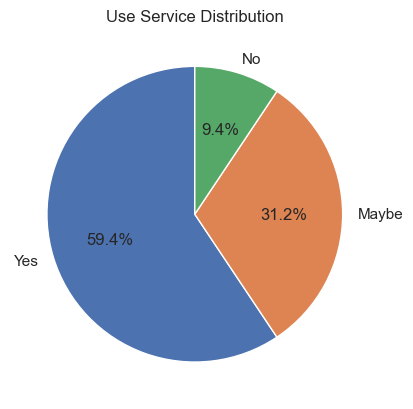

In [105]:
# Get the counts for each category in the useService column
use_service_counts = df['useService'].value_counts()

# Create a pie chart for the useService column
plt.pie(use_service_counts, labels=use_service_counts.index, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title("Use Service Distribution")

# Display the pie chart
plt.show()

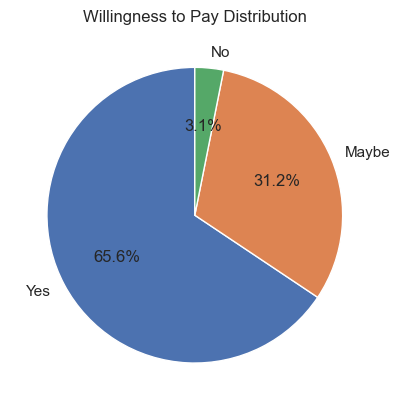

In [106]:
# Get the counts for each category in the willpay column
willpay_counts = df['willpay'].value_counts()

# Create a pie chart for the willpay column
plt.pie(willpay_counts, labels=willpay_counts.index, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title("Willingness to Pay Distribution")

# Display the pie chart
plt.show()

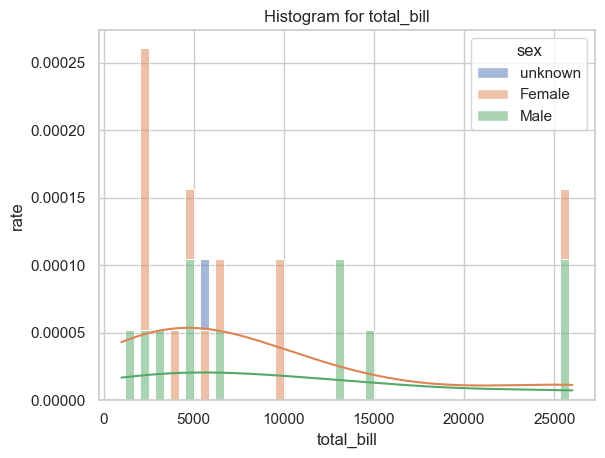

In [107]:
# seaborn을 활용한 시각화
sns.histplot(data=df, x='tipPrice',
             bins=30, # bin의 갯수
             kde=True, #kernel density estimate to smooth the histogram
             hue='sex', # 색깔에 따른 구분
             multiple='stack', # dodge
             stat="density", # 비율로 확인할 때
             shrink=0.6 # bin의 두께
             )
plt.title('Histogram for total_bill')
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

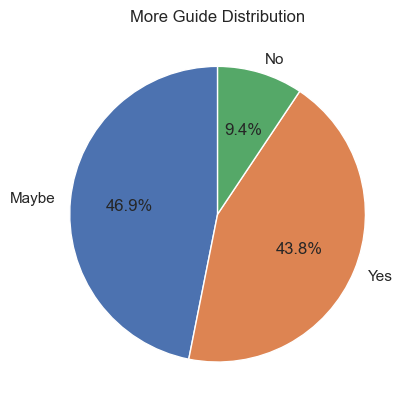

In [108]:
# Get the counts for each category in the moreGuide column
more_guide_counts = df['moreGuide'].value_counts()

# Create a pie chart for the moreGuide column
plt.pie(more_guide_counts, labels=more_guide_counts.index, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title("More Guide Distribution")

# Display the pie chart
plt.show()

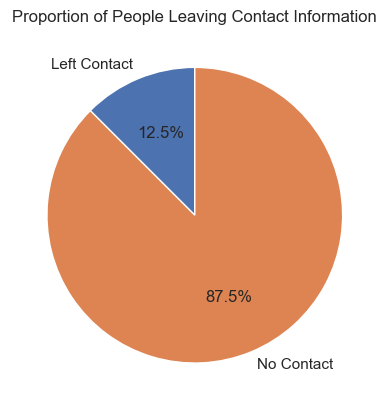

In [109]:
# Calculate the number of people who left contact information and those who didn't
left_contact = df['Contact'].notna().sum()
no_contact = df['Contact'].isna().sum()

# Create a pie chart for the Contact column
plt.pie([left_contact, no_contact], labels=['Left Contact', 'No Contact'], autopct='%1.1f%%', startangle=90)

# Set the title
plt.title("Proportion of People Leaving Contact Information")

# Display the pie chart
plt.show()